In [140]:
import pandas as pd
import numpy as np
import polars as pl
import os
from os import listdir
from os.path import isfile, join
import sketch
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

<font size = 6>CSV REUSABLE METHOD</font>

In [8]:
def get_df_info(csv):
    try:
        df = pd.read_csv(csv)    
    except FileNotFoundError:
        pass
    return df
        
            

In [9]:
bills = get_df_info('it.csv')
#billy = get_df_info('yall.csv')

In [10]:
#bills['Amount']
bills[['Amount','Bills']]

,Amount,Bills
0,2200.0,Mortgage
1,110.0,Energy
2,50.0,Gas
3,100.0,Water
4,589.0,Car
5,500.0,Car2
6,599.0,Car3
7,1014.0,Childcare
8,1100.0,Childcare2
9,275.0,Phone


CURRENT GOVERNORS

In [11]:
#current_governors = pd.read_html("https://en.wikipedia.org/wiki/List_of_current_United_States_governors", header=1)[1]
current_governors = pd.read_html("https://en.wikipedia.org/wiki/List_of_current_United_States_governors")[1]
current_governors.columns = current_governors.columns.droplevel()
current_governors['Governor']

0                   Kay Ivey
1              Mike Dunleavy
2                Katie Hobbs
3     Sarah Huckabee Sanders
4               Gavin Newsom
5                Jared Polis
6                 Ned Lamont
7                John Carney
8               Ron DeSantis
9                 Brian Kemp
10                Josh Green
11               Brad Little
12            J. B. Pritzker
13              Eric Holcomb
14              Kim Reynolds
15               Laura Kelly
16              Andy Beshear
17          John Bel Edwards
18               Janet Mills
19                 Wes Moore
20              Maura Healey
21          Gretchen Whitmer
22                  Tim Walz
23               Tate Reeves
24               Mike Parson
25            Greg Gianforte
26                Jim Pillen
27              Joe Lombardo
28              Chris Sununu
29               Phil Murphy
30    Michelle Lujan Grisham
31              Kathy Hochul
32                Roy Cooper
33               Doug Burgum
34            

In [12]:
current_governors = pd.read_html("https://en.wikipedia.org/wiki/List_of_current_United_States_governors", header=1, index_col=0)[1]
current_governors.Born


State
Alabama (list)           (age 78)
Alaska (list)            (age 62)
Arizona (list)           (age 53)
Arkansas (list)          (age 40)
California (list)        (age 55)
Colorado (list)          (age 48)
Connecticut (list)       (age 69)
Delaware (list)          (age 67)
Florida (list)           (age 44)
Georgia (list)           (age 59)
Hawaii (list)            (age 53)
Idaho (list)             (age 69)
Illinois (list)          (age 58)
Indiana (list)           (age 55)
Iowa (list)              (age 63)
Kansas (list)            (age 73)
Kentucky (list)          (age 45)
Louisiana (list)         (age 56)
Maine (list)             (age 75)
Maryland (list)          (age 44)
Massachusetts (list)     (age 52)
Michigan (list)          (age 51)
Minnesota (list)         (age 59)
Mississippi (list)       (age 49)
Missouri (list)          (age 67)
Montana (list)           (age 62)
Nebraska (list)          (age 67)
Nevada (list)            (age 60)
New Hampshire (list)     (age 48)
New Jers

In [13]:
mint = pd.read_html("https://en.wikipedia.org/wiki/Linux_Mint")[2]
mint

,Version,Codename,Edition,Codebase,Compatible repository,Default desktop environment,Release date,LTS,Support end
0,NaN,Ada,Main,Kubuntu 6.06,Kubuntu 6.06,KDE,27 August 2006,—,Un­known
1,NaN,Barbara,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,13 November 2006,—,April 2008
2,NaN,Bea,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 December 2006,—,April 2008
3,NaN,Bianca,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 February 2007,—,April 2008
4,NaN,Bianca,Light,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,29 March 2007,—,April 2008
...,...,...,...,...,...,...,...,...,...
95,NaN,Una[60],Cinnamon MATE Xfce,Ubuntu 20.04 LTS (Focal Fossa),Ubuntu 20.04 LTS (Focal Fossa),Cinnamon MATE Xfce,7 January 2022,Yes,April 2025
96,NaN,Vanessa[61],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,31 July 2022,Yes,April 2027
97,21.1,Vera[62],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,20 December 2022,Yes,April 2027
98,NaN,Victoria[63],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,Possibly June 2023,Yes,April 2027


In [14]:
mint

,Version,Codename,Edition,Codebase,Compatible repository,Default desktop environment,Release date,LTS,Support end
0,NaN,Ada,Main,Kubuntu 6.06,Kubuntu 6.06,KDE,27 August 2006,—,Un­known
1,NaN,Barbara,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,13 November 2006,—,April 2008
2,NaN,Bea,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 December 2006,—,April 2008
3,NaN,Bianca,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 February 2007,—,April 2008
4,NaN,Bianca,Light,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,29 March 2007,—,April 2008
...,...,...,...,...,...,...,...,...,...
95,NaN,Una[60],Cinnamon MATE Xfce,Ubuntu 20.04 LTS (Focal Fossa),Ubuntu 20.04 LTS (Focal Fossa),Cinnamon MATE Xfce,7 January 2022,Yes,April 2025
96,NaN,Vanessa[61],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,31 July 2022,Yes,April 2027
97,21.1,Vera[62],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,20 December 2022,Yes,April 2027
98,NaN,Victoria[63],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,Possibly June 2023,Yes,April 2027


In [15]:
mint.columns

Index(['Version', 'Codename', 'Edition', 'Codebase', 'Compatible repository',
       'Default desktop environment', 'Release date', 'LTS', 'Support end'],
      dtype='object')

In [16]:
mint.rename(columns = {"Default desktop environment": "DE"}, inplace=True)
mint

,Version,Codename,Edition,Codebase,Compatible repository,DE,Release date,LTS,Support end
0,NaN,Ada,Main,Kubuntu 6.06,Kubuntu 6.06,KDE,27 August 2006,—,Un­known
1,NaN,Barbara,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,13 November 2006,—,April 2008
2,NaN,Bea,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 December 2006,—,April 2008
3,NaN,Bianca,Main,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,20 February 2007,—,April 2008
4,NaN,Bianca,Light,Ubuntu 6.10 (Edgy Eft),Ubuntu 6.10 (Edgy Eft),GNOME,29 March 2007,—,April 2008
...,...,...,...,...,...,...,...,...,...
95,NaN,Una[60],Cinnamon MATE Xfce,Ubuntu 20.04 LTS (Focal Fossa),Ubuntu 20.04 LTS (Focal Fossa),Cinnamon MATE Xfce,7 January 2022,Yes,April 2025
96,NaN,Vanessa[61],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,31 July 2022,Yes,April 2027
97,21.1,Vera[62],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,20 December 2022,Yes,April 2027
98,NaN,Victoria[63],Cinnamon MATE Xfce,Ubuntu 22.04 LTS (Jammy Jellyfish),Ubuntu 22.04 LTS (Jammy Jellyfish),Cinnamon MATE Xfce,Possibly June 2023,Yes,April 2027


In [105]:
sofi = web.get_data_yahoo('SOFI', start='2022-01-01', end='2023-06-20')

[*********************100%***********************]  1 of 1 completed


In [18]:
bills.sketch.ask("what is this data about?")

In [19]:
bills.describe

<bound method NDFrame.describe of          Bills  Amount  fill             fill2   fill3
0     Mortgage  2200.0   NaN               NaN     NaN
1       Energy   110.0   NaN               NaN     NaN
2          Gas    50.0   NaN               NaN     NaN
3        Water   100.0   NaN               NaN     NaN
4          Car   589.0   NaN               NaN     NaN
5         Car2   500.0   NaN               NaN     NaN
6         Car3   599.0   NaN               NaN     NaN
7    Childcare  1014.0   NaN               NaN     NaN
8   Childcare2  1100.0   NaN               NaN     NaN
9        Phone   275.0   NaN               NaN     NaN
10   Insurance   286.0   NaN               NaN     NaN
11         NaN  6823.0   NaN  Tahoe and Subaru  1089.0
12         NaN     NaN   NaN  Childcare Total:  2114.0
13         NaN     NaN   NaN               NaN  3203.0>

In [20]:
bills.shape

(14, 5)

In [21]:
bills.sketch.ask("what is this highest bill?")

In [22]:
bills.sketch.ask("what is this lowest bill?")

In [23]:
bills.sketch.ask("What type of analysis could we perform")

In [88]:
bills.sketch.howto("analyze relationship between bills and amount")

NameError: name 'bills' is not defined

In [25]:
sofi.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-12', '2023-06-13', '2023-06-14',
               '2023-06-15', '2023-06-16'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [26]:
sofi.sketch.howto("how can i visualize adj close")

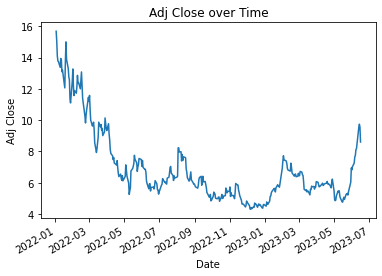

In [106]:


# import matplotlib library
import matplotlib.pyplot as plt

# create a line plot of the Adj Close column
sofi['Adj Close'].plot(kind='line')

# add labels to the plot
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# show the plot
plt.show()

In [107]:
sofi['Adj Close']

Date
2022-01-03    15.68
2022-01-04    15.05
2022-01-05    14.10
2022-01-06    13.78
2022-01-07    13.74
              ...  
2023-06-12     9.16
2023-06-13     9.54
2023-06-14     9.74
2023-06-15     9.55
2023-06-16     8.60
Name: Adj Close, Length: 366, dtype: float64

In [29]:
sofi.to_csv("sofi.csv")

In [ ]:
os.getcwd()

In [31]:
sofi.index.day

Int64Index([ 3,  4,  5,  6,  7, 10, 11, 12, 13, 14,
            ...
             5,  6,  7,  8,  9, 12, 13, 14, 15, 16],
           dtype='int64', name='Date', length=366)

In [34]:
sofi.shape

(366, 6)

In [96]:
nu = web.get_data_yahoo('nu', start='2022-01-01', end='2023-06-29')

[*********************100%***********************]  1 of 1 completed


In [97]:
nu

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,9.60,10.000,9.55,9.98,9.98,6896100
2022-01-04,10.15,10.220,9.48,9.74,9.74,8551800
2022-01-05,9.68,9.710,8.92,9.04,9.04,13773400
2022-01-06,9.01,9.530,8.46,9.52,9.52,11014200
2022-01-07,9.50,9.680,9.14,9.36,9.36,4784700
...,...,...,...,...,...,...
2023-06-22,7.64,7.716,7.45,7.49,7.49,27952400
2023-06-23,7.40,7.700,7.36,7.56,7.56,166404700
2023-06-26,7.52,7.580,7.22,7.31,7.31,21200600


In [39]:
nu.shape

(373, 6)

<font size = 6>NU - Stock Prices over 18 Months</font>

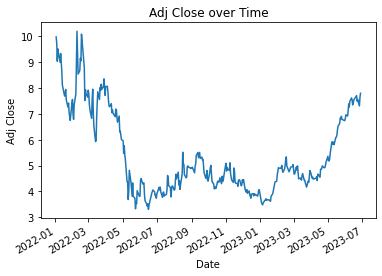

In [98]:
# create a line plot of the Adj Close column
nu['Adj Close'].plot(kind='line')

# add labels to the plot
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# show the plot
plt.show()

<font size = 6> NU - Minimum Price</font>

In [44]:
nu['Adj Close'].min()

3.309999942779541

<font size = 6> NU - Maximum Price</font>

In [45]:
nu['Adj Close'].max()

10.199999809265137

In [64]:
stocks_not_downloaded = []

<font size = 6>Download Stocks</font>

In [82]:
from datetime import datetime as dt
import time
from pandas_datareader import data as web

folder = "/home/champ/code/Python4Finance/champlist/"
folder2 = "/home/champ/code/Python4Finance/df_to_csv/"

def save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt(syear, smonth, sday)
    end = dt(eyear, emonth, eday)
    try:
        print("Get Data for : ", ticker)
        df = web.get_data_yahoo(ticker, start, end)['Adj Close']
        time.sleep(10)
        df.to_csv(folder + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Could not get data for: ", ticker)

In [70]:
def get_stock_df_from_csv(folder, ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [17]:
def get_column_from_csv(file, column_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[column_name]
            

<font size = 6>Add Daily Return</font>

In [49]:
PATH = '/home/champ/code/Linguistics/Python/jupyter/'
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv(PATH + ticker + '.csv')
    return df

<font size = 6>Return ROI for Defined Time</font>

In [11]:
def get_roi_defined_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    start = df[df['Date'] == S_DATE_STR]['Adj Close'][0]
    end = df[df['Date'] == E_DATE_STR]['Adj Close'][0]
    print(f"Initial Price: {start}")
    print(f"Final Price: {end}")
    roi = (end - start) / start
    return roi

<font size = 6>Return on Investment over Time</font>

In [187]:
def roi_between_date(df, sdate, edate):
    try:
        start = df.loc[sdate, 'Adj Close']
        end = df.loc[edate, 'Adj Close']
        roi = ((end - start) / start)
    except Exception:
        print("Data is Bad")
    else:
        return roi

<font size = 6>Average Between Dates</font>

In [189]:
def get_avg_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].mean()

<font size = 6>Standard Deviation over Time</font>

In [190]:
def get_std_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].std()

<font size = 6>Get Covariance Between Dates</font>

def get_cov_between_dates(df, sdate, edate):
    avg = get_avg_between_dates(df, sdate, edate)
    sd = get_std_between_dates(df, sdate, edate)
    return sd / avg

<font size = 6>Coefficient of Variation</font>

In [12]:
def get_cov(stock):
    mean = stock['Adj Close'].mean()
    sd = stock['Adj Close'].std()
    cov = sd / mean
    return cov

<font size = 6>Delete Unnamed Columns</font>

In [55]:
def delete_unnamed_cols(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

<font size = 6>Validate Funcs</font>

In [84]:
tickers = get_column_from_csv("/home/champ/code/Python4Finance/Wilshire-5000-Stocks.csv", "Ticker")

files = [ x for x in listdir(folder) if isfile(join(folder, x))]
tickers2 = [ os.path.splitext(x)[0] for x in files ]

In [51]:
listdir(PATH)

['luv.csv', 'wallstreet.ipynb', 'BanasTut.ipynb', '.ipynb_checkpoints']

In [63]:
folder = "/home/champ/code/Python4Finance/champlist/"
for x in range(20):
    save_to_csv_from_yahoo(folder, tickers[x], 2020, 1, 1, 2023, 6, 29)
print("Finished")

Get Data for :  A
[*********************100%***********************]  1 of 1 completed
Get Data for :  AA
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAL
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAME
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAN
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAOI
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAON
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAP
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAPL
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAT
[*********************100%***********************]  1 of 1 completed
Get Data for :  AAWW
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AAWW']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  AAXN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AAXN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ABBV
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABC
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABCB
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABEO
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABG
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABIO
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABM
[*********************100%***********************]  1 of 1 completed
Get Data for :  ABMD
[*********************100%***********************]  1 of 1 completed
Finished


In [82]:
aapl = pd.read_csv(folder + "AAPL.csv")

In [85]:
aapl.info

<bound method DataFrame.info of            Date   Adj Close
0    2020-01-02   73.347939
1    2020-01-03   72.634842
2    2020-01-06   73.213623
3    2020-01-07   72.869293
4    2020-01-08   74.041496
..          ...         ...
873  2023-06-22  187.000000
874  2023-06-23  186.679993
875  2023-06-26  185.270004
876  2023-06-27  188.059998
877  2023-06-28  189.250000

[878 rows x 2 columns]>

In [86]:
aapl.head()

,Date,Adj Close
0,2020-01-02,73.347939
1,2020-01-03,72.634842
2,2020-01-06,73.213623
3,2020-01-07,72.869293
4,2020-01-08,74.041496


In [87]:
aal = get_stock_df_from_csv(folder, "AAL")

In [88]:
aal

,Date,Adj Close
0,2020-01-02,28.982893
1,2020-01-03,27.548195
2,2020-01-06,27.219410
3,2020-01-07,27.119778
4,2020-01-08,27.737495
...,...,...
873,2023-06-22,16.360001
874,2023-06-23,16.260000
875,2023-06-26,16.440001
876,2023-06-27,17.350000


In [5]:
luv = web.get_data_yahoo('LUV', start='2022-01-01', end='2023-06-20')


[*********************100%***********************]  1 of 1 completed


In [28]:
luv.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2022-01-03  43.169998  44.259998  42.509998  44.000000  43.312012  10571400  \
2022-01-04  44.709999  45.540001  44.480000  44.660000  43.961685  11207000   
2022-01-05  44.950001  45.200001  43.799999  43.990002  43.302170   9702000   
2022-01-06  44.480000  44.680000  43.070000  43.889999  43.203728   6750700   
2022-01-07  44.189999  45.680000  44.110001  45.349998  44.640900   7479100   
...               ...        ...        ...        ...        ...       ...   
2023-06-12  30.990000  31.870001  30.969999  31.459999  31.294662   8837200   
2023-06-13  31.610001  32.529999  31.580000  32.450001  32.279461   8559500   
2023-06-14  32.709999  33.639999  32.680000  33.570000  33.393574  14745200   
2023-06-15  33.529999  34.060001  33.459999  33.970001  33.791473  11142500   
2023-06-16  34.18999

In [32]:
add_daily_return_to_df(luv, 'luv')

<font size = 6>Return Dataframe from CSV</font>

In [65]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Does Not Exist")
    else:
        return df

<font size = 6>Save Dataframe To CSV</font>

In [68]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(folder2 + ticker + '.csv')

<font size = 6>Multiple DF Merge</font>

In [ ]:
def 

<font size = 6>Adding Daily Return</font>

In [33]:
luv_plus = pd.read_csv(PATH + 'luv.csv')
luv_plus

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2022-01-03,43.169998,44.259998,42.509998,44.000000,43.312012,10571400,NaN
1,2022-01-04,44.709999,45.540001,44.480000,44.660000,43.961685,11207000,0.015000
2,2022-01-05,44.950001,45.200001,43.799999,43.990002,43.302170,9702000,-0.015002
3,2022-01-06,44.480000,44.680000,43.070000,43.889999,43.203728,6750700,-0.002273
4,2022-01-07,44.189999,45.680000,44.110001,45.349998,44.640900,7479100,0.033265
...,...,...,...,...,...,...,...,...
361,2023-06-12,30.990000,31.870001,30.969999,31.459999,31.294662,8837200,0.027433
362,2023-06-13,31.610001,32.529999,31.580000,32.450001,32.279461,8559500,0.031469
363,2023-06-14,32.709999,33.639999,32.680000,33.570000,33.393574,14745200,0.034515
364,2023-06-15,33.529999,34.060001,33.459999,33.970001,33.791473,11142500,0.011915


In [159]:
luv_plus.sketch.howto("how can i make a line chart")

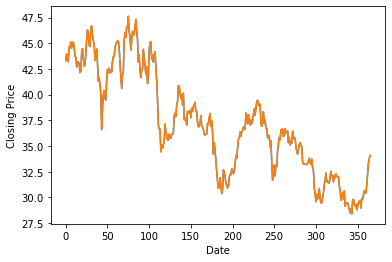

In [166]:


# import matplotlib library
#import matplotlib.pyplot as plt
luv_plus['Adj Close'].plot(kind='line')
# create a line chart of the 'Close' column in luv_plus
plt.plot(luv_plus['Adj Close'])

# add labels to the x and y axes
plt.xlabel('Date')
plt.ylabel('Closing Price')

# show the plot
plt.show()


<font size = 6>Daily Returns & Clean Up Files</font>

In [86]:
for ticker in tickers2:
    print(f"Working on: {ticker}")
    stock_df = get_df_from_csv(ticker)
    add_daily_return_to_df(stock_df, ticker)
    stock_df = delete_unnamed_cols(stock_df)
    save_dataframe_to_csv(stock_df, ticker)

Working on: A
Working on: AA
Working on: AAT
Working on: AAP
Working on: AAXN
Working on: AAME
Working on: AAN
Working on: ABM
Working on: ABG
Working on: ABEO
Working on: AAOI
Working on: AAPL
Working on: AAL
Working on: ABIO
Working on: AAON
Working on: ABCB
Working on: ABBV
Working on: AAWW
Working on: ABC
Working on: ABMD


In [64]:
listdir(folder)

['A.csv',
 'AA.csv',
 'AAT.csv',
 'AAP.csv',
 'AAXN.csv',
 'AAME.csv',
 'AAN.csv',
 'ABM.csv',
 'ABG.csv',
 'ABEO.csv',
 'AAOI.csv',
 'AAPL.csv',
 'AAL.csv',
 'ABIO.csv',
 'AAON.csv',
 'ABCB.csv',
 'ABBV.csv',
 'AAWW.csv',
 'ABC.csv',
 'ABMD.csv']

In [85]:
tickers2

['A',
 'AA',
 'AAT',
 'AAP',
 'AAXN',
 'AAME',
 'AAN',
 'ABM',
 'ABG',
 'ABEO',
 'AAOI',
 'AAPL',
 'AAL',
 'ABIO',
 'AAON',
 'ABCB',
 'ABBV',
 'AAWW',
 'ABC',
 'ABMD']

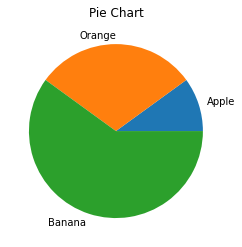

In [91]:
sizes = [10, 30, 60]
labels = ['Apple', 'Orange', 'Banana']
plt.pie(sizes, labels=labels)
plt.title("Pie Chart")
plt.show()

In [109]:
listdir()

['A.csv',
 'AA.csv',
 'AAT.csv',
 'AAP.csv',
 'luv.csv',
 'AAXN.csv',
 'AAME.csv',
 'wallstreet.ipynb',
 'AAN.csv',
 'ABM.csv',
 'ABG.csv',
 'ABEO.csv',
 'AAOI.csv',
 'AAPL.csv',
 'AAL.csv',
 'BanasTut.ipynb',
 'ABIO.csv',
 'AAON.csv',
 'ABCB.csv',
 'ABBV.csv',
 '.ipynb_checkpoints',
 'ABC.csv',
 'ABMD.csv']

In [110]:
a = pl.read_csv('A.csv')
a

,Date,Adj Close,daily_return
i64,str,f64,f64
0,"""2020-01-02""",83.948067,null
1,"""2020-01-03""",82.600189,-0.016056
2,"""2020-01-06""",82.84436,0.002956
3,"""2020-01-07""",83.098305,0.003065
4,"""2020-01-08""",83.918747,0.009873
5,"""2020-01-09""",85.237312,0.015712
6,"""2020-01-10""",85.549866,0.003667
7,"""2020-01-13""",85.422874,-0.001484
8,"""2020-01-14""",85.940529,0.00606


In [113]:
a.filter(pl.col("Adj Close") > 100)

,Date,Adj Close,daily_return
i64,str,f64,f64
169,"""2020-09-02""",101.48085,0.022745
191,"""2020-10-05""",101.368919,0.032956
193,"""2020-10-07""",102.116013,0.022139
194,"""2020-10-08""",102.391266,0.002695
195,"""2020-10-09""",103.964088,0.015361
196,"""2020-10-12""",103.639702,-0.00312
197,"""2020-10-13""",103.629868,-0.000095
198,"""2020-10-14""",103.275978,-0.003415
199,"""2020-10-15""",103.531563,0.002475


In [135]:
a.select(['daily_return'])

daily_return
f64
null
-0.016056
0.002956
0.003065
0.009873
0.015712
0.003667
-0.001484
0.00606


In [127]:
a.columns

['', 'Date', 'Adj Close', 'daily_return']

In [137]:
a.select(['Adj Close'])

Adj Close
f64
83.948067
82.600189
82.84436
83.098305
83.918747
85.237312
85.549866
85.422874
85.940529


In [136]:
a

,Date,Adj Close,daily_return
i64,str,f64,f64
0,"""2020-01-02""",83.948067,null
1,"""2020-01-03""",82.600189,-0.016056
2,"""2020-01-06""",82.84436,0.002956
3,"""2020-01-07""",83.098305,0.003065
4,"""2020-01-08""",83.918747,0.009873
5,"""2020-01-09""",85.237312,0.015712
6,"""2020-01-10""",85.549866,0.003667
7,"""2020-01-13""",85.422874,-0.001484
8,"""2020-01-14""",85.940529,0.00606


In [157]:
a.select(['daily_return'])

daily_return
f64
null
-0.016056
0.002956
0.003065
0.009873
0.015712
0.003667
-0.001484
0.00606


In [158]:
a.sketch.howto("how can i mamke a line chart")

AttributeError: 'DataFrame' object has no attribute 'sketch'

In [178]:
a['Adj Close'].var()


647.6768870124279

In [143]:
sofi.sketch.ask("what is this dataset about")

In [186]:
sofi
sofi['Close'].var()

5.720141573907139

In [146]:
arr = np.arange(18)

In [147]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [150]:
shaped = arr.reshape(3,6)

In [149]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [155]:
for i in arr:
    if i > 11:
        print(i)
else:
    print("and we are finished!")

12
13
14
15
16
17
and we are finished!


In [156]:
len(arr)

18

In [163]:
luv_plus.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'daily_return'],
      dtype='object')

In [164]:
luv_plus['Date']

0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-06
4      2022-01-07
          ...    
361    2023-06-12
362    2023-06-13
363    2023-06-14
364    2023-06-15
365    2023-06-16
Name: Date, Length: 366, dtype: object